# Night Summary for MJD 58905 (starting evening of 2020-02-25)


Sun json
Civil (6°)	Nautical (12°)	Astronomical (18°)

Evening	2020-02-26 01:45:58Z	2020-02-26 02:13:51Z	2020-02-26 02:42:10Z

Midpoint	2020-02-26 07:39:09Z	2020-02-26 07:39:11Z	2020-02-26 07:39:12Z

Morning	2020-02-26 13:32:21Z	2020-02-26 13:04:31Z	2020-02-26 12:36:14Z

Moon json
Phase
5.7%

Moonrise
2020-02-25 15:22:21Z

Moonset
2020-02-26 03:19:53Z

52081	SV tile 70506 M67)	04:14:05Z	133.41751	11.67719	300.0	science	DESI

52082	SV tile 70506 M67)	04:25:20Z	133.41678	11.67739	300.0	science	DESI

52083	SV tile 70506 M67)	04:36:17Z	133.41621	11.67754	300.0	science	DESI

52084	SV tile 70508 M67)	04:49:03Z	133.41557	11.67770	300.0	science	DESI

52085	SV tile 70508 M67)	05:02:35Z	133.41493	11.67783	300.0	science	DESI

52086	SV tile 70508 M67)	05:14:34Z	133.41439	11.67792	300.0	science	DESI

52087	SV tile 70508 M67)	05:25:31Z	133.41392	11.67798	300.0	science	DESI

52088	SV tile 70508 M67)	05:40:15Z	133.41331	11.67804	300.0	science	DESI

52089	SV tile 70508 M67)	05:51:30Z	133.41284	11.67806	300.0	science	DESI

52090	SV tile 70502	06:07:12Z	180.01200	-0.51026	900.0	science	DESI

52112	SV tile 70502	07:03:08Z	180.00693	-0.50838	900.0	science	DESI

52113	SV tile 70502	07:26:28Z	180.00532	-0.50784	900.0	science	DESI

52114	SV tile 70502	07:49:12Z	180.00393	-0.50744	900.0	science	DESI

52115	SV tile 70502	08:10:21Z	180.00276	-0.50717	900.0	science	DESI

52116	SV tile 70502	08:32:35Z	180.00163	-0.50699	900.0	science	DESI

In [1]:
import numpy as np
import fitsio
from astropy.table import Table, vstack, hstack
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tile_id = 70502
path = "/project/projectdirs/desi/spectro/redux/daily/tiles/{}/20200225".format(tile_id)

In [3]:
zbest_files = glob.glob(path+"/zbest*")

In [4]:
zbest_files

['/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-3-70502-20200225.fits',
 '/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-7-70502-20200225.fits',
 '/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-9-70502-20200225.fits',
 '/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-6-70502-20200225.fits',
 '/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-0-70502-20200225.fits']

In [5]:
zbest_data = {}
zbest_fibermap = {}
for i, zbest_file in enumerate(zbest_files):
    zbest_data[i] = Table.read(zbest_file, 'ZBEST')
    zbest_fibermap[i] = Table.read(zbest_file, 'FIBERMAP')
    print(len(zbest_data[i]))

500
500
500
500
500


In [6]:
zbest_data_all = vstack(list(zbest_data.values()))
zbest_data_all.sort('TARGETID')
fibermap_all = vstack(list(zbest_fibermap.values()))
fibermap_all.sort('TARGETID')

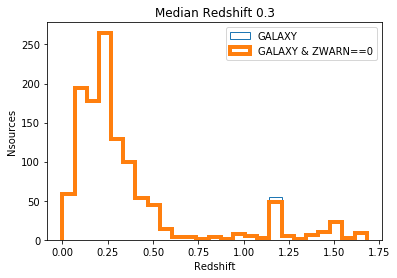

In [7]:
is_galaxy = zbest_data_all['SPECTYPE']=='GALAXY' 
no_warning = zbest_data_all['ZWARN']==0
positive_flux = fibermap_all['FLUX_R']>0.0
good_fiber = fibermap_all['FIBERSTATUS']==0
_=plt.hist(zbest_data_all['Z'][good_fiber & is_galaxy & positive_flux], bins=25, label='GALAXY', histtype='step')
_=plt.hist(zbest_data_all['Z'][good_fiber & is_galaxy & no_warning & positive_flux], bins=25, label='GALAXY & ZWARN==0', histtype='step', linewidth=4)
plt.title("Median Redshift {:.1f}".format(np.median(zbest_data_all['Z'][is_galaxy & no_warning & good_fiber])))
plt.xlabel('Redshift')
plt.ylabel('Nsources')
plt.legend()

In [8]:
zbest_data_all

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,NUMEXP,NUMTILE
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64,int32,int32
35185712445786261,25651.32187811491,6299.002370114701 .. 0.0,0.0005226517775207594,2.8357801158421117e-06,0,7758,STAR,K,5,14799.273653944758,0,0
35185712445786287,10746.545581519604,1054.5767915789954 .. 72.48115893585835,1.6556743778982108,8.87707880498596e-05,0,7758,GALAXY,,10,17.863597571849823,0,0
35185712445788791,10173.758414924145,-26.21945099952736 .. -5.667924129857734,0.6669170195157538,3.807474934522135e-05,4,7757,GALAXY,,10,2.4792800545692444,0,0
35185712445789423,14822.562668060835,1563.979395023786 .. 0.0,-4.8250524092662925e-05,4.772979295170034e-06,0,7758,STAR,K,5,6413.032216953163,0,0
35185712445789787,12523.552356250799,1701.449763631042 .. 0.0,0.00025723635169548885,7.079237380293098e-06,0,7731,STAR,K,5,1640.3872114343285,0,0
35185712449979202,19150.939883377832,2919.8797268141307 .. 0.0,6.494017983474686e-05,1.7491254641872203e-05,0,7759,STAR,F,5,6390.501035842615,0,0
35185712449979490,35221.86532576348,2302.6895190322452 .. 0.0,-5.97581183062811e-05,3.4529750412649034e-06,0,7758,STAR,K,5,4623.697977587923,0,0
35185712449979800,14898.67607331276,859.6701565184374 .. 96.29253542342148,0.28329715376963,6.786155919140386e-06,0,7759,GALAXY,,10,1484.541034936905,0,0
35185712449979886,22373.098727345467,2797.1978850440423 .. 11.16534323366582,0.14791612512038504,1.863783107711742e-05,0,7759,GALAXY,,10,1647.0493733882904,0,0


In [9]:
flux_r = fibermap_all['FLUX_R']/fibermap_all['MW_TRANSMISSION_R']
fiberflux_r = fibermap_all['FIBERFLUX_R']/fibermap_all['MW_TRANSMISSION_R']
rmag = 22.5-2.5*np.log10(flux_r)
fiber_rmag = 22.5-2.5*np.log10(fiberflux_r)

rmag[np.isnan(rmag)] = 100 
fiber_rmag[np.isnan(fiber_rmag)] = 100

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


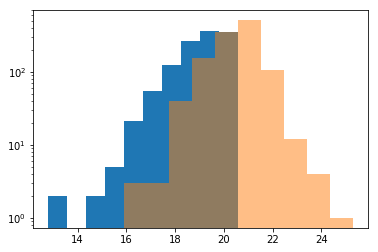

In [10]:
_ = plt.hist(rmag[is_galaxy & positive_flux & good_fiber], log=True)
_ = plt.hist(fiber_rmag[is_galaxy & positive_flux & good_fiber], log=True, alpha=0.5)

In [11]:
delta_r = 0.5
r_mag_bins = np.arange(16, 20.0, delta_r)
z_warn0_frac = np.ones(len(r_mag_bins))
z_warn0_frac_err = np.ones(len(r_mag_bins))

for i,r_min in enumerate(r_mag_bins):
    print(r_min)
    r_max = r_min + delta_r
    ii = (rmag>r_min) & (rmag<r_max)
    is_galaxy = zbest_data_all[ii]['SPECTYPE']=='GALAXY' 
    no_warning = zbest_data_all[ii]['ZWARN']==0
    good_fiber = fibermap_all[ii]['FIBERSTATUS']==0

    n_tot = np.count_nonzero(is_galaxy)
    n_no_warn = np.count_nonzero(no_warning & is_galaxy)
    z_warn0_frac[i] = n_no_warn/n_tot
    z_warn0_frac_err[i] = np.sqrt(n_no_warn)/n_tot

    print(n_tot, n_no_warn)

16.0
23 20
16.5
27 25
17.0
57 52
17.5
94 87
18.0
134 130
18.5
223 211
19.0
300 287
19.5
216 193


Text(0,0.5,'FRACTION ZWARN==0')

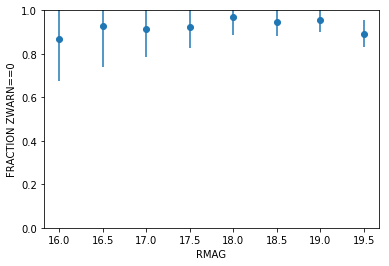

In [12]:
plt.errorbar(r_mag_bins, z_warn0_frac, z_warn0_frac_err, fmt='o')
plt.ylim([0,1])
plt.xlabel('RMAG')
plt.ylabel('FRACTION ZWARN==0')

In [13]:
delta_r = 1.0
r_mag_bins = np.arange(16, 24.0, delta_r)
z_warn0_frac = np.ones(len(r_mag_bins))
z_warn0_frac_err = np.ones(len(r_mag_bins))

for i,r_min in enumerate(r_mag_bins):
    print(r_min)
    r_max = r_min + delta_r
    ii = (fiber_rmag>r_min) & (fiber_rmag<r_max)
    is_galaxy = zbest_data_all[ii]['SPECTYPE']=='GALAXY' 
    no_warning = zbest_data_all[ii]['ZWARN']==0
    good_fiber = fibermap_all[ii]['FIBERSTATUS']==0
    n_tot = np.count_nonzero(is_galaxy & good_fiber)
    n_no_warn = np.count_nonzero(no_warning & is_galaxy & good_fiber)
    print(n_tot, n_no_warn)
    z_warn0_frac[i] = n_no_warn/n_tot
    z_warn0_frac_err[i] = np.sqrt(n_no_warn)/n_tot



16.0
2 2
17.0
11 10
18.0
68 66
19.0
227 225
20.0
511 500
21.0
332 328
22.0
33 31
23.0
5 4


Text(0,0.5,'FRACTION ZWARN==0')

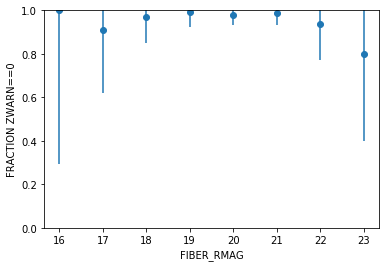

In [14]:
plt.errorbar(r_mag_bins, z_warn0_frac, z_warn0_frac_err, fmt='o')
plt.ylim([0,1])
plt.xlabel('FIBER_RMAG')
plt.ylabel('FRACTION ZWARN==0')